# Analyzing Cardiac data: Examining Health Factors To Predict The Presence of Heart Disease


### Introduction

Millions of people are affected by heart diseases every year.  It is the most prominent cause of death globally, taking over “17.9 million lives each year” (WHO).  Heart disease is the umbrella term referring to various conditions, such as coronary artery disease, cerebrovascular disease, peripheral artery disease, and aortic atherosclerosis.  Cholesterol and blood pressure are often linked with the risk of heart disease. Cholesterol is a lipophilic molecule and does not easily dissolve in blood. Excess amounts of cholesterol can contribute to the formation of atherosclerotic plaques, which can lead to coronary artery disease. High blood pressure makes the heart work more to pump blood as the artery walls are too high due to the force of the blood being pushed against it. As people age, their bodies become less able to manage both cholesterol and blood pressure levels.
<br><br>
The other variables included in the heart disease data set were not included in our analysis for several reasons.  The first is that we wanted to pick the predictor variables that we know from previous research to likely have the strongest relationship in indicating heart disease.  Some of the variables that the data set included, also could be an indication of a different disease such as diabetes (an Example being fasting blood sugar variable).  The last reason is because the clasisfier may not perform well if there are too many predictors due to an overload of data.
<br><br>
Taking this into account, can we diagnose a patient with heart disease based on their resting blood pressure, serum cholesterol, and age?  We will be using the Cleveland database, from the UCI Machine Learning Repository’s heart disease data set to answer this predictive question.
<br><br>
Our variables of interest:
- **age**: patient age in years
- **restbps**: patient's resting blood pressure, measured in mm Hg
- **chol**: patient's cholesterol levels, measured in mg/dL

### Preliminary Exploratory Data Analysis

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

We begin our analysis by first reading our database. The database assigns its heart disease diagnoses under the `num` column as a value of 0 to 4, where any number more than 0 indicates the presence of heart disease. Because we will only be interested in whether or not a patient has heart disease, we added a new column `diag` that returns "No" if `num` is 0 (patient does NOT have heart disease), and "Yes" for all other values.

In [2]:
heartdisease_link <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heartdisease_data <- read_csv(heartdisease_link, col_names = FALSE) |>
    rename(age = X1,
           sex = X2,
           cp = X3,
           restbps = X4,
           chol = X5,
           fbs = X6,
           restecg = X7,
           thalach = X8,
           exang = X9,
           oldpeak = X10,
           slope = X11,
           ca = X12,
           thal = X13,
           num = X14) |>
    mutate(diag = case_when(num == 0 ~ "No",
                            TRUE ~ "Yes"))
heartdisease_data$diag <- as.factor(heartdisease_data$diag)

glimpse(heartdisease_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 303
Columns: 15
$ age     <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, 52, 57…
$ sex     <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,…
$ cp      <dbl> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, 3, 2, 1,…
$ restbps <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 13…
$ chol    <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 25…
$ fbs     <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,…
$ restecg <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,…
$ thalach <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 14…
$ exang   <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,…
$ oldpeak <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, 0.…
$ slope   <dbl> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2,…
$ ca      <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0", "0.0", "1.0",…
$ thal    <chr> "6

Next, we split our dataframe into a training and testing set, the former of which will be analyzed for our selected predictor variables. As evidenced by the number of rows in the glimpsed table, 75% of the data went into our training set.

In [3]:
heartdisease_split <- initial_split(heartdisease_data, prop = 0.75, strata = num)
heartdisease_train <- training(heartdisease_split)
heartdisease_test <- testing(heartdisease_split)

glimpse(heartdisease_train)

Rows: 226
Columns: 15
$ age     <dbl> 63, 37, 41, 56, 56, 44, 52, 54, 48, 49, 64, 58, 50, 58, 43, 69…
$ sex     <dbl> 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,…
$ cp      <dbl> 1, 3, 2, 2, 2, 2, 3, 4, 3, 2, 1, 1, 3, 3, 4, 1, 4, 3, 4, 4, 1,…
$ restbps <dbl> 145, 130, 130, 120, 140, 120, 172, 140, 130, 130, 110, 150, 12…
$ chol    <dbl> 233, 250, 204, 236, 294, 263, 199, 239, 275, 266, 211, 283, 21…
$ fbs     <dbl> 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ restecg <dbl> 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,…
$ thalach <dbl> 150, 187, 172, 178, 153, 173, 162, 160, 139, 171, 144, 162, 15…
$ exang   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,…
$ oldpeak <dbl> 2.3, 3.5, 1.4, 0.8, 1.3, 0.0, 0.5, 1.2, 0.2, 0.6, 1.8, 1.0, 1.…
$ slope   <dbl> 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,…
$ ca      <chr> "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0",…
$ thal    <chr> "6

As part of our exploratory analysis, we also summarized our dataframe to display the mean of each of our selected predictor variables according to the patient diagnosis. As expected, patients diagnosed with heart disease were, on average, older than those diagnosed without it, and had higher cholesterol and resting blood pressure.

In [4]:
heartdisease_means <- heartdisease_train |>
    group_by(diag) |>
    summarize(age_mean = mean(age, na.rm = TRUE),
             restbps_mean = mean(restbps, na.rm = TRUE),
             chol_mean = mean(chol, na.rm = TRUE))

heartdisease_means

diag,age_mean,restbps_mean,chol_mean
<fct>,<dbl>,<dbl>,<dbl>
No,52.71545,129.0000,244.0244
Yes,56.13592,135.4757,251.2330


Individual histograms were made for each predictor variable, to see how they lined up with the patient diagnoses. Here, unexpected results emerged. While it was evident that older patients had more heart disease diagnoses than younger patients, no clear correlations could be found for the cholesterol and resting blood pressure predictors.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



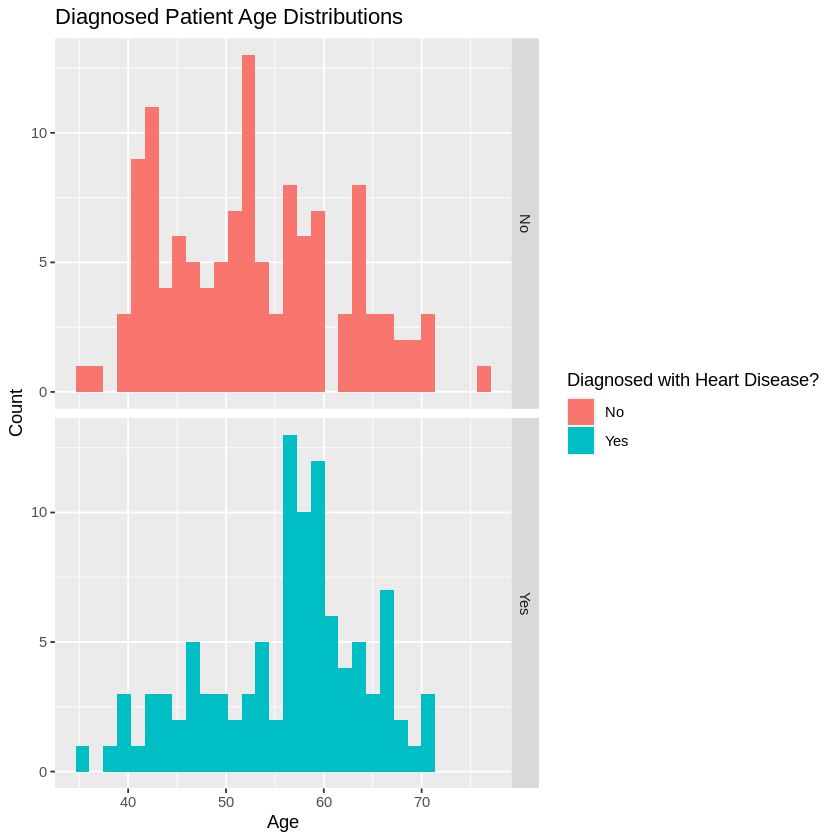

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



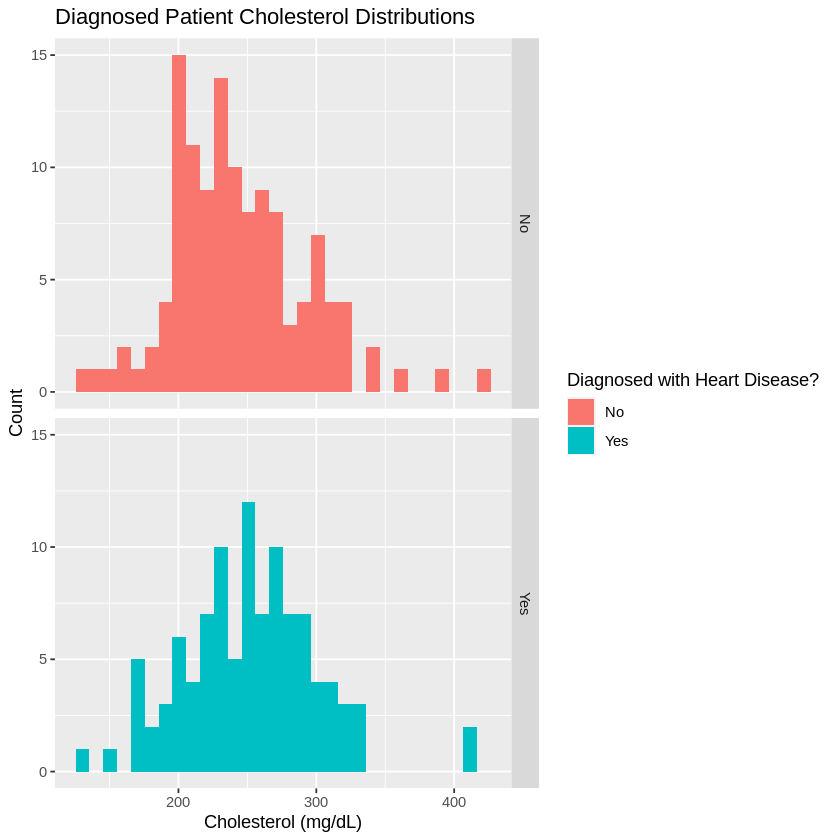

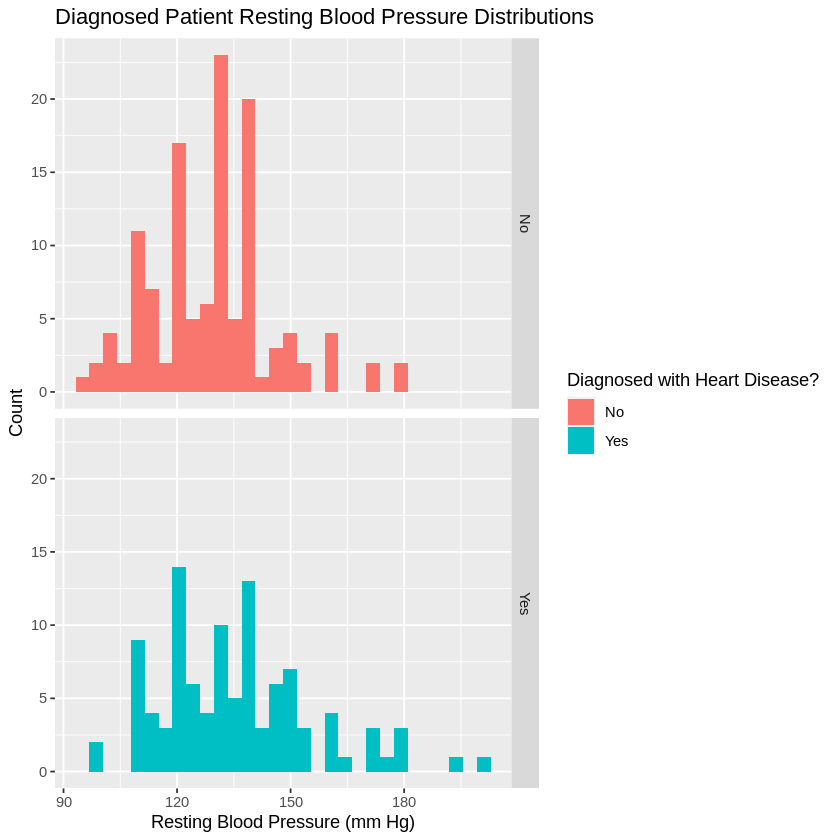

In [5]:
# visualizing the age predictor
train_plot_age <- heartdisease_train |>
    ggplot(aes(x = age, fill = diag)) + 
    geom_histogram(position = "identity") + 
    labs(x = "Age",
         y = "Count",
         fill = "Diagnosed with Heart Disease?",
         title = "Diagnosed Patient Age Distributions") + 
    facet_grid(rows = vars(diag))
train_plot_age

# visualizing the cholesterol predictor
train_plot_chol <- heartdisease_train |>
    ggplot(aes(x = chol, fill = diag)) + 
    geom_histogram(position = "identity") + 
    labs(x = "Cholesterol (mg/dL)",
         y = "Count",
         fill = "Diagnosed with Heart Disease?",
         title = "Diagnosed Patient Cholesterol Distributions") + 
    facet_grid(rows = vars(diag))
train_plot_chol

# visualizing the blood pressure predictor
train_plot_bps <- heartdisease_train |>
    ggplot(aes(x = restbps, fill = diag)) + 
    geom_histogram(position = "identity") + 
    labs(x = "Resting Blood Pressure (mm Hg)",
         y = "Count",
         fill = "Diagnosed with Heart Disease?",
         title = "Diagnosed Patient Resting Blood Pressure Distributions") + 
    facet_grid(rows = vars(diag))
train_plot_bps

Comparing age with our two other predictor variables in scatterplots did not show any strong correlations or visible clusters either:

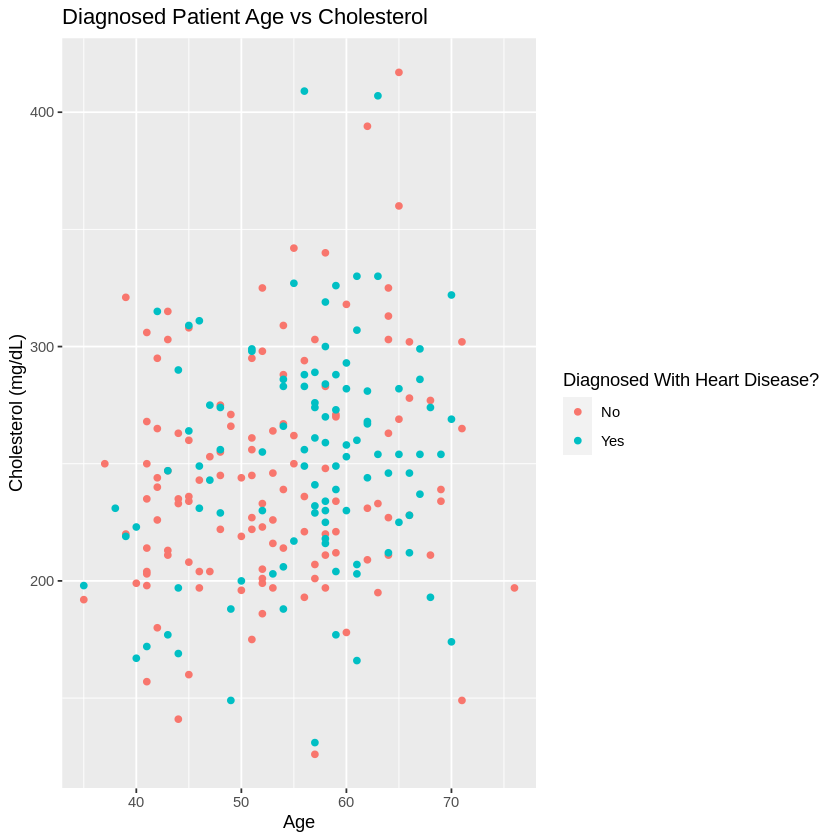

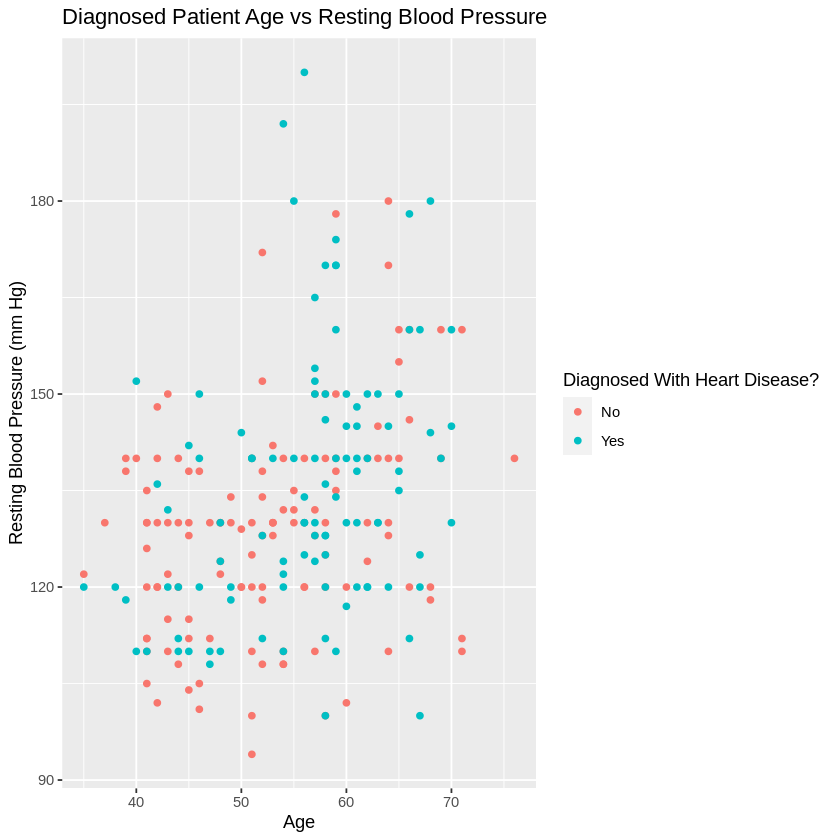

In [6]:
train_plot_age_chol <- heartdisease_train |>
    ggplot(aes(x = age, y = chol, color = diag)) + 
    geom_point() + 
    labs(x = "Age",
         y = "Cholesterol (mg/dL)",
         color = "Diagnosed With Heart Disease?",
         title = "Diagnosed Patient Age vs Cholesterol")
train_plot_age_chol

train_plot_age_bps <- heartdisease_train |>
    ggplot(aes(x = age, y = restbps, color = diag)) + 
    geom_point() + 
    labs(x = "Age",
         y = "Resting Blood Pressure (mm Hg)",
         color = "Diagnosed With Heart Disease?",
         title = "Diagnosed Patient Age vs Resting Blood Pressure")
train_plot_age_bps

### Methods

The variables that we will be examining to predict the presence of heart disease include resting blood pressure, serum cholesterol, and age. We can determine this by using the “classification” method. This will involve processes like creating “recipes”, training the data, as well as making a workflow. To make the analysis of this question more simple, we will likely plot out our manipulated data in the form of a scatter plot. This visualization will make it clear whether or not the patient has heart disease. By using colors and labels to organize our scatter plot we will be better able to analyze our data.

### Expected Outcomes and Significance

After plotting our data, we expect to find the presence of heart disease in older patients. We expected to find this diagnosis among patients with higher cholesterol and/or resting blood pressure as well, but our exploratory data analysis seemed to indicate otherwise. These findings are confusing, but could be vital in saving the lives of patients as heart disease can be deadly if left untreated, but manageable with proper treatment.

According to our research, typically people with higher blood sugar and cholesterol are more at risk for heart disease. However, according to our data, no such correlation could be found. After our classifier is built, we will be able to confirm whether or no these predictors are truly unable to accurately diagnose a patient with heart disease.

### Results

Warning message:
“tune samples were requested but there were 226 rows in the data. 221 will be used.”


max_accuracy,k_value
<dbl>,<dbl>
0.6369565,26


K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 26
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(26,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.340708
Best kernel: rectangular
Best k: 26

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.54545455
kap,binary,0.09775695


          Truth
Prediction No Yes
       No  20  14
       Yes 21  22

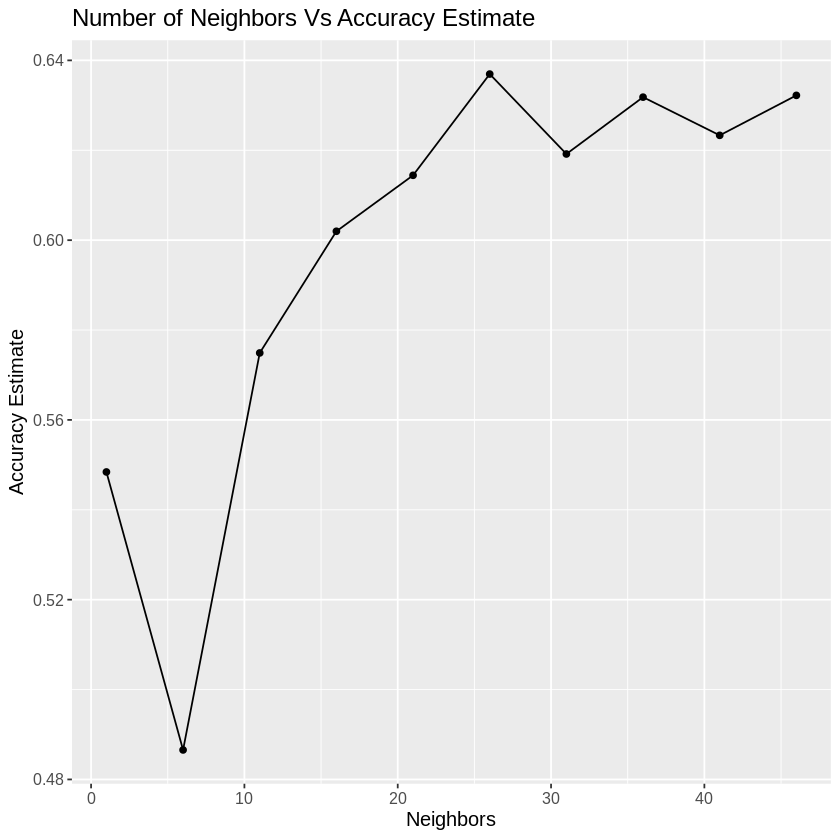

In [9]:
set.seed(1)

hd_recipe <- recipe(diag ~ chol + restbps + age, data = heartdisease_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    prep()

preprocessed_data <- hd_recipe |> 
                        bake(heartdisease_data)

knn_spec <-nearest_neighbor(weight_func= "rectangular", neighbors= tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

hd_fit <- workflow() |>
                   add_recipe(hd_recipe) |>
                   add_model(knn_spec) |>
                   fit(data = heartdisease_train)

hd_test_predictions <- predict(hd_fit, heartdisease_test) |>
  bind_cols(heartdisease_test)

### Finding best k value

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 5))

hd_vfold <- vfold_cv(heartdisease_train, v = 5, strata = diag)

knn_results <- workflow() |>
  add_recipe(hd_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = hd_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

k_value_with_best_accuracy <- accuracies |> 
summarize(max_accuracy = max(mean), k_value = neighbors[which(mean == max(mean))])

k_value_with_best_accuracy

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
ggtitle("Number of Neighbors Vs Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

### Building a model with the best value for K

hd_new_spec <- nearest_neighbor(weight_func= "rectangular", neighbors= 26) |>
    set_engine("kknn") |>
    set_mode("classification")
hd_new_spec

hd_new_fit <- workflow() |>
       add_recipe(hd_recipe) |>
       add_model(hd_new_spec) |>
       fit(data= heartdisease_train)    
hd_new_fit

### Predictions
hd_predictions <- predict(hd_new_fit , heartdisease_test) |>
       bind_cols(heartdisease_test)

hd_metrics <- hd_predictions |>
         metrics(truth = diag, estimate = .pred_class) 
hd_metrics

hd_confusion_matrix <- hd_predictions |> 
       conf_mat(truth = diag, estimate = .pred_class)
hd_confusion_matrix